<a href="https://colab.research.google.com/github/ewdlop/Secret/blob/main/SecretMessage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install Pillow pycryptodome stegano



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\ray81\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [11]:
# Function to encrypt message
def encrypt_message(message, pub_key):
    rsa_key = RSA.import_key(pub_key)
    cipher = PKCS1_OAEP.new(rsa_key)
    encrypted_message = cipher.encrypt(message.encode())
    return base64.b64encode(encrypted_message).decode()

# Function to decrypt message
def decrypt_message(encrypted_message, priv_key):
    rsa_key = RSA.import_key(priv_key)
    cipher = PKCS1_OAEP.new(rsa_key)
    decrypted_message = cipher.decrypt(base64.b64decode(encrypted_message))
    return decrypted_message.decode()

In [14]:
#from google.colab import files
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
from stegano import lsb
from PIL import Image
import base64

# Upload an image file
uploaded = files.upload()
original_image = list(uploaded.keys())[0]  # Use the uploaded file name

#original_image = Image.open("candy.jpg")

# Generate RSA Keys
key = RSA.generate(2048)
private_key = key.export_key()
public_key = key.publickey().export_key()

print(private_key)
print(public_key)

# Encrypt a message
message = "Secret Message"
encrypted_message = encrypt_message(message, public_key)

# Embed the encrypted message into the uploaded image
secret_image = "secret_image.png"  # Output image with secret
image_with_secret = lsb.hide(original_image, encrypted_message)
image_with_secret.save(secret_image)

# Extract the message from the image
extracted_message = lsb.reveal(secret_image)

# Decrypt the extracted message
decrypted_message = decrypt_message(extracted_message, private_key)

print(f"Original Message: {message}")
print(f"Encrypted Message: {encrypted_message}")
print(f"Decrypted Message: {decrypted_message}")


ModuleNotFoundError: No module named 'Crypto'

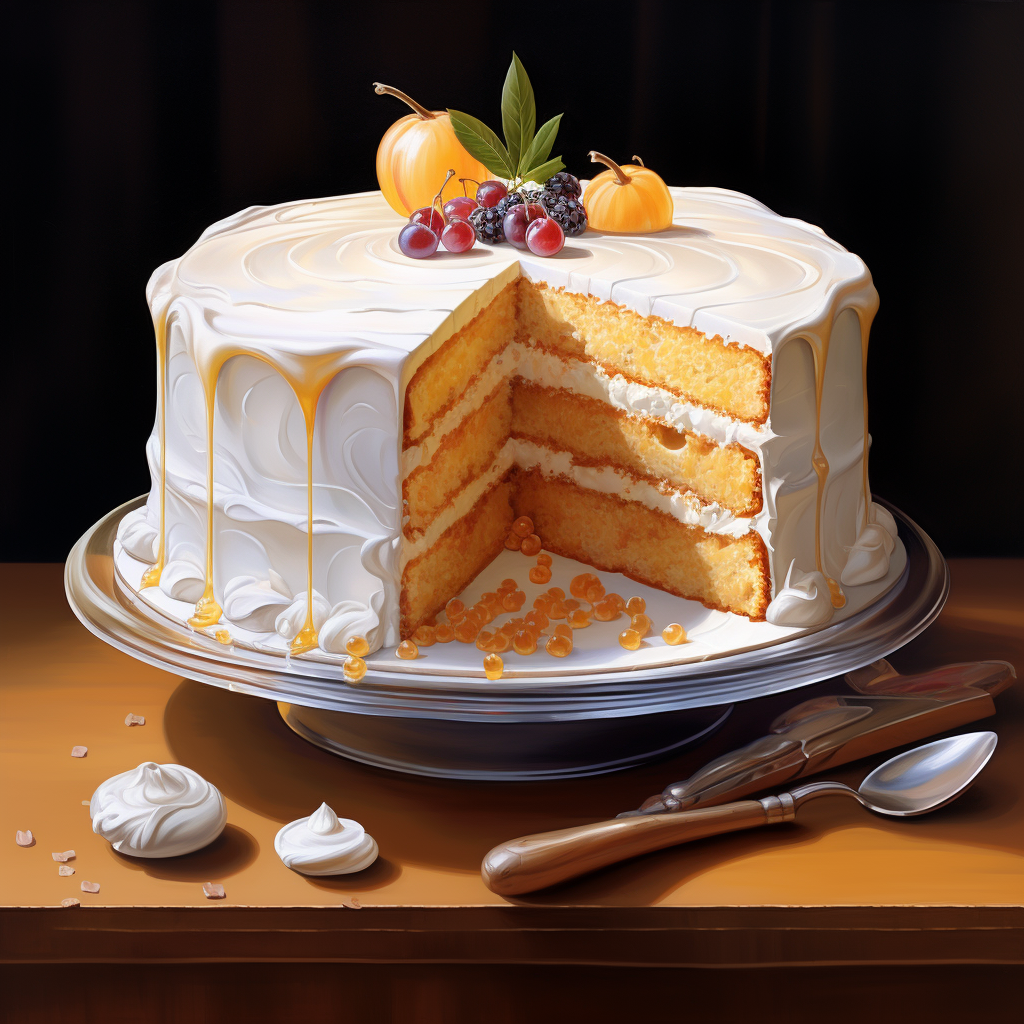

In [14]:
from IPython.display import Image, display

# Display the image
display(Image(filename='secret_image.png'))